In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Baseline BERT model
## Empathy

In [10]:
adapter_model = pd.read_csv('../output/history_adapters_distress_22-04-12_1202.csv')  
adapter_model.epoch = adapter_model.epoch.astype(int)
adapter_model

,Unnamed: 0,epoch,avrg_dev_loss,avrg_dev_r2,dev_corr,train_corr,avrg_train_loss,train_time_elapsed,model_saved
0,0,0,0.100046,NaN,0.210497,0.244726,0.156439,20.985089,1.0
1,1,1,0.096232,NaN,0.352658,0.434667,0.103304,21.324214,0.0
2,2,2,0.090338,NaN,0.390790,0.479460,0.095680,21.564281,0.0
3,3,3,0.088605,NaN,0.389967,0.498901,0.092033,21.700754,0.0
4,4,4,0.089459,NaN,0.395678,0.512734,0.084146,21.857770,0.0
5,5,5,0.088849,NaN,0.398736,0.531641,0.081442,21.924770,0.0
6,6,6,0.086752,NaN,0.407415,0.556156,0.078314,22.128440,0.0
7,7,7,0.087367,NaN,0.414619,0.563387,0.075877,22.295512,0.0
8,8,8,0.087043,NaN,0.414137,0.570232,0.072996,22.296947,0.0
9,9,9,0.087846,NaN,0.413622,0.568936,0.072372,22.330574,0.0


In [11]:
adapter_model['bert_param_size'] = np.zeros(adapter_model.shape[0]) + 1000
adapter_model

,Unnamed: 0,epoch,avrg_dev_loss,avrg_dev_r2,dev_corr,train_corr,avrg_train_loss,train_time_elapsed,model_saved,bert_param_size
0,0,0,0.100046,NaN,0.210497,0.244726,0.156439,20.985089,1.0,1000.0
1,1,1,0.096232,NaN,0.352658,0.434667,0.103304,21.324214,0.0,1000.0
2,2,2,0.090338,NaN,0.390790,0.479460,0.095680,21.564281,0.0,1000.0
3,3,3,0.088605,NaN,0.389967,0.498901,0.092033,21.700754,0.0,1000.0
4,4,4,0.089459,NaN,0.395678,0.512734,0.084146,21.857770,0.0,1000.0
5,5,5,0.088849,NaN,0.398736,0.531641,0.081442,21.924770,0.0,1000.0
6,6,6,0.086752,NaN,0.407415,0.556156,0.078314,22.128440,0.0,1000.0
7,7,7,0.087367,NaN,0.414619,0.563387,0.075877,22.295512,0.0,1000.0
8,8,8,0.087043,NaN,0.414137,0.570232,0.072996,22.296947,0.0,1000.0
9,9,9,0.087846,NaN,0.413622,0.568936,0.072372,22.330574,0.0,1000.0


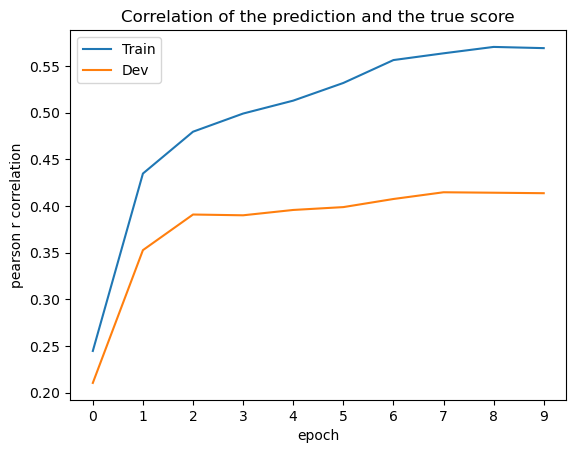

In [12]:
plt.plot(adapter_model[['train_corr', 'dev_corr']], label=['Train', 'Dev'])
plt.title('Correlation of the prediction and the true score')
plt.ylabel('pearson r correlation')
plt.xlabel('epoch')
plt.xticks(np.array(range(adapter_model.epoch.max() + 1)))
plt.legend()
plt.show()

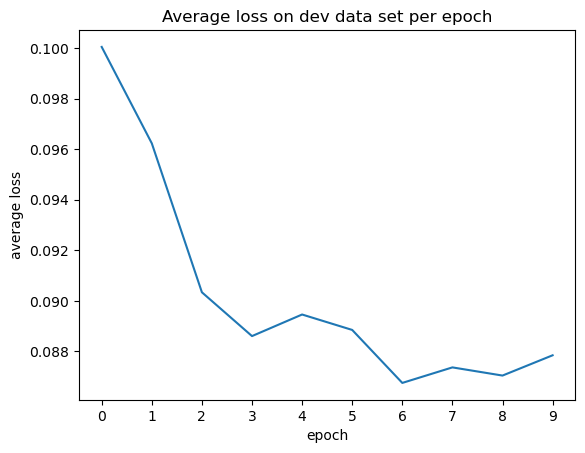

In [13]:
plt.plot(adapter_model[['avrg_dev_loss']])
plt.title('Average loss on dev data set per epoch')
plt.ylabel('average loss')
plt.xlabel('epoch')
plt.xticks(np.array(range(adapter_model.epoch.max() + 1)))
plt.show()

# Compare adapters to full-fine tuning
### Methods

In [14]:
def time_elapes_per_epoch(data):
    if "train_time_elapsed" in data.columns:
        return data["train_time_elapsed"].mean()
    else: 
        print("train_time_elapsed is not saved in the data")

### With same learning rate (5e-5)

Using "Multi input" - One parameter for empathy ranking

In [15]:
#multi_input_model = pd.read_csv('../output/history_multiinput_distress_22-04-12_1100.csv')  
#multi_input_model.epoch = multi_input_model.epoch.astype(int)
#apater_model = pd.read_csv('../output/history_adapters_distress_22-04-12_1100.csv')
#apater_model.epoch = apater_model.epoch.astype(int)
#multi_input_apater_model = pd.read_csv('../output/history_multiinput_adapters_distress_22-04-12-_1119.csv')  # wihtuot multiinput
#multi_input_apater_model.epoch = multi_input_apater_model.epoch.astype(int)
#multi_input_apater_model

In [16]:
#plt.plot(multi_input_model[['train_corr']], label='Train Full Param', c='cornflowerblue', linestyle="--")
#plt.plot(multi_input_model[['dev_corr']], label='Dev Full Param', c='cornflowerblue', linestyle="-")
#plt.plot(multi_input_apater_model[['train_corr']], label='Train Adapter', c='orange', linestyle="--")
#plt.plot(multi_input_apater_model[['dev_corr']], label='Dev Adapter', c='orange', linestyle="-")
#plt.title('Correlation of the prediction and the true score \n for train and dev data of Roberta with adapter (Adapter) and Roberta with full fine-tuning \n using additional input: 1d lexical data of empathy / distress lexicon')
#plt.ylabel('pearson r correlation')
#plt.xlabel('epoch')
#plt.xticks(np.array(range(multi_input_model.epoch.max() + 1)))
#plt.legend()
#plt.show()

In [17]:
print("Mean time elapsed per epoch")
print("multi_input_model", time_elapes_per_epoch(multi_input_model))
print("multi_input_apater_model", time_elapes_per_epoch(multi_input_apater_model))

Mean time elapsed per epoch


NameError: name 'multi_input_model' is not defined

# Compare adapter own head with baseline bert (both without additional input)
lr: 5e-5
layers same
wihtout additional input

In [ ]:
adapter_model = pd.read_csv('../output/history_adapters_distress_22-04-12_1202.csv')  
adapter_model.epoch = adapter_model.epoch.astype(int)
roberta_baseline = pd.read_csv('../output/history_baseline_distress_22-04-12_1223.csv')
roberta_baseline.epoch = roberta_baseline.epoch.astype(int)

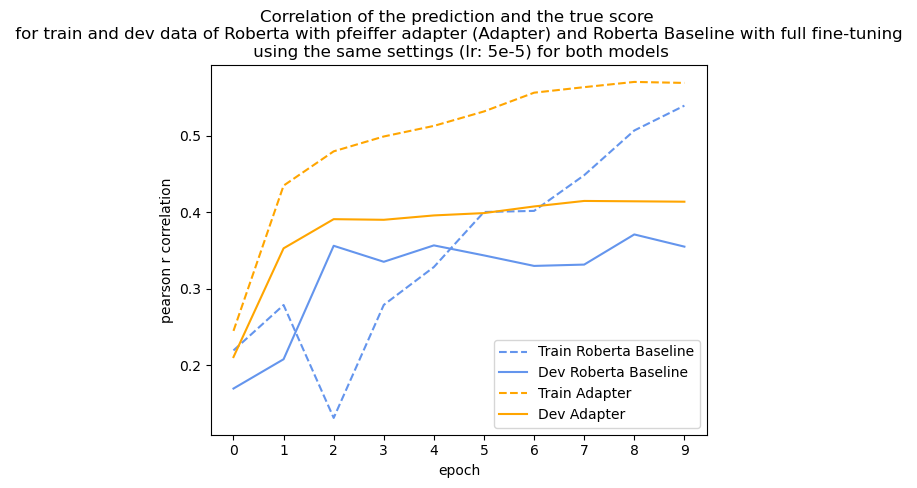

In [ ]:
plt.plot(roberta_baseline[['train_corr']], label='Train Roberta Baseline', c='cornflowerblue', linestyle="--")
plt.plot(roberta_baseline[['dev_corr']], label='Dev Roberta Baseline', c='cornflowerblue', linestyle="-")
plt.plot(adapter_model[['train_corr']], label='Train Adapter', c='orange', linestyle="--")
plt.plot(adapter_model[['dev_corr']], label='Dev Adapter', c='orange', linestyle="-")
plt.title('Correlation of the prediction and the true score \n for train and dev data of Roberta with pfeiffer adapter (Adapter) and Roberta Baseline with full fine-tuning \n using the same settings (lr: 5e-5) for both models')
plt.ylabel('pearson r correlation')
plt.xlabel('epoch')
plt.xticks(np.array(range(adapter_model.epoch.max() + 1)))
plt.legend()
plt.show()

In [ ]:
print("Mean time elapsed per epoch")
print("roberta_baseline", time_elapes_per_epoch(roberta_baseline))
print("adapter_model", time_elapes_per_epoch(adapter_model))

Mean time elapsed per epoch
roberta_baseline 32.82971613407135
adapter_model 21.840835070610048


# Compare adapter types

In [ ]:
adapter_pfeiffer_model = pd.read_csv('../output/history_adapters_distress_22-04-12_1202.csv')  
adapter_pfeiffer_model.epoch = adapter_pfeiffer_model.epoch.astype(int)
adapter_parallel_model = pd.read_csv('../output/history_adapters_parallel_distress.csv')
adapter_parallel_model.epoch = adapter_parallel_model.epoch.astype(int)

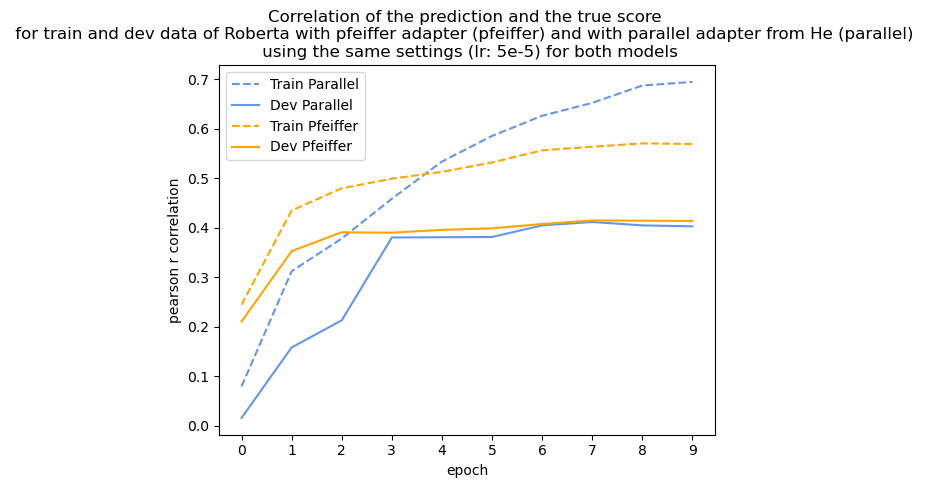

In [ ]:
plt.plot(adapter_parallel_model[['train_corr']], label='Train Parallel', c='cornflowerblue', linestyle="--")
plt.plot(adapter_parallel_model[['dev_corr']], label='Dev Parallel', c='cornflowerblue', linestyle="-")
plt.plot(adapter_pfeiffer_model[['train_corr']], label='Train Pfeiffer', c='orange', linestyle="--")
plt.plot(adapter_pfeiffer_model[['dev_corr']], label='Dev Pfeiffer', c='orange', linestyle="-")
plt.title('Correlation of the prediction and the true score \n for train and dev data of Roberta with pfeiffer adapter (pfeiffer) and with parallel adapter from He (parallel)  \n using the same settings (lr: 5e-5) for both models')
plt.ylabel('pearson r correlation')
plt.xlabel('epoch')
plt.xticks(np.array(range(adapter_model.epoch.max() + 1)))
plt.legend()
plt.show()

In [ ]:
print("Mean time elapsed per epoch")
print("adapter_parallel_model", time_elapes_per_epoch(adapter_parallel_model))
print("adapter_pfeiffer_model", time_elapes_per_epoch(adapter_pfeiffer_model))

Mean time elapsed per epoch
adapter_parallel_model 23.15816195011139
adapter_pfeiffer_model 21.840835070610048


# Compare different parameter updating techniques

In [72]:
full_fine_tuning = pd.read_csv('../output/history_baseline_distress_22-04-15_0828.csv')
only_bias = pd.read_csv('../output/history_baseline_distress_22-04-15_0638.csv')  
only_bias_mlp = pd.read_csv('../output/history_baseline_distress_22-04-19_0921.csv')  
pfeiffer = pd.read_csv('../output/history_adapters_distress_22-04-15_0808.csv')  
parallel = pd.read_csv('../output/history_adapters_distress_22-04-18_1129.csv')
scaled_parallel = pd.read_csv('../output/history_adapters_distress_22-04-18_1155.csv')
mam = pd.read_csv('../output/history_adapters_distress_22-04-15_0722.csv')
prefix_tuning = pd.read_csv('../output/history_adapters_distress_22-04-18_1107.csv')
myprefix_tuning = pd.read_csv('../output/history_adapters_distress_22-04-18_1217.csv')
prefix_flat = pd.read_csv('../output/history_adapters_distress_22-04-18_1119.csv')
houlsby = pd.read_csv('../output/history_adapters_distress_22-04-18_1052.csv')
 
histories = [('full_fine_tuning', full_fine_tuning), ('pfeiffer', pfeiffer), ('parallel', parallel), ('scaled_parallel', scaled_parallel), ('prefix_flat', prefix_flat),
            ('prefix_tuning', prefix_tuning), ('myprefix_tuning', myprefix_tuning), ('houlsby', houlsby), ('mam', mam), ('only_bias', only_bias), ('only_bias_mlp', only_bias_mlp)]
#mymam = pd.read_csv('../')
# Compare adapter types

In [73]:
full_fine_tuning

,Unnamed: 0,epoch,avrg_dev_loss,avrg_dev_r2,dev_corr,train_corr,avrg_train_loss,train_time_elapsed
0,0,0,0.083410,NaN,0.447003,0.548739,0.110707,31.895871
1,1,1,0.082272,NaN,0.462922,0.710300,0.070337,32.430370
2,2,2,0.087441,NaN,0.471653,0.752747,0.052445,32.759289


In [74]:
max_epochs = 9 # 19
metric = 'train_time_elapsed'#'dev_corr' # 'avrg_dev_loss'

def compare_models(histories, metric, max_epochs=9):
    for n, h in histories:
        corr = h[metric]
        #print(corr)
        p = plt.plot(corr, label=n)
        # if model is not trained for 10 epochs, extend it with a dotted line
        missing_diff = max_epochs + 1 - len(corr)
        if missing_diff > 0:
            corr_ext = [corr[-1:].item() for e in range(missing_diff + 1)]  # extension
            corr_ext_y = [len(corr) - 1 + e for e in range(missing_diff + 1)] 
            plt.plot(corr_ext_y, corr_ext, linestyle='--', c=p[0].get_color())
            
    plt.xlim(0, max_epochs)
    plt.legend(loc="upper right",bbox_to_anchor=(1.4,1))
    plt.title(f'Comparison of different parameter training methods \n metric: {metric}')
    plt.ylabel(metric.replace('_', ' '))
    plt.xlabel('epoch')
    plt.show()

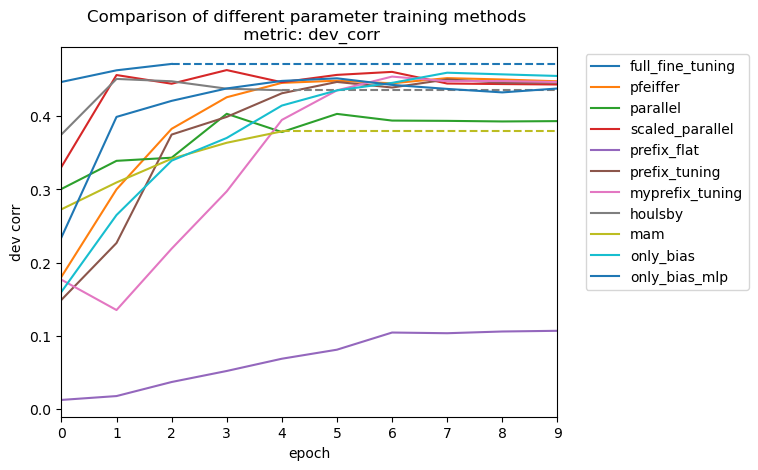

In [75]:
compare_models(histories=histories, metric='dev_corr', max_epochs=9)

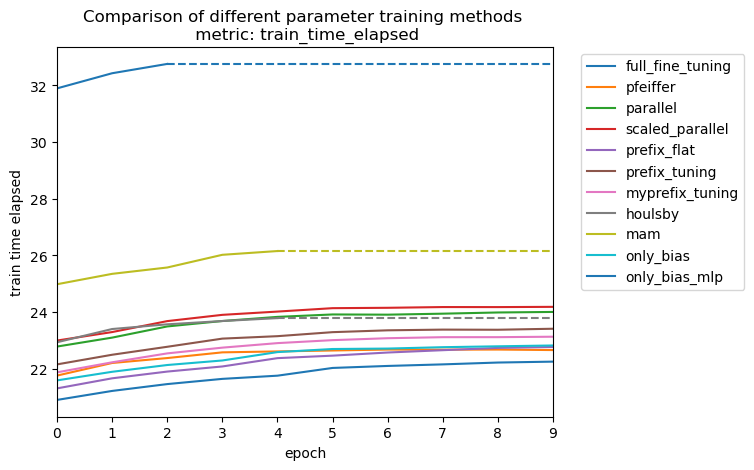

In [76]:
compare_models(histories=histories, metric='train_time_elapsed', max_epochs=9)

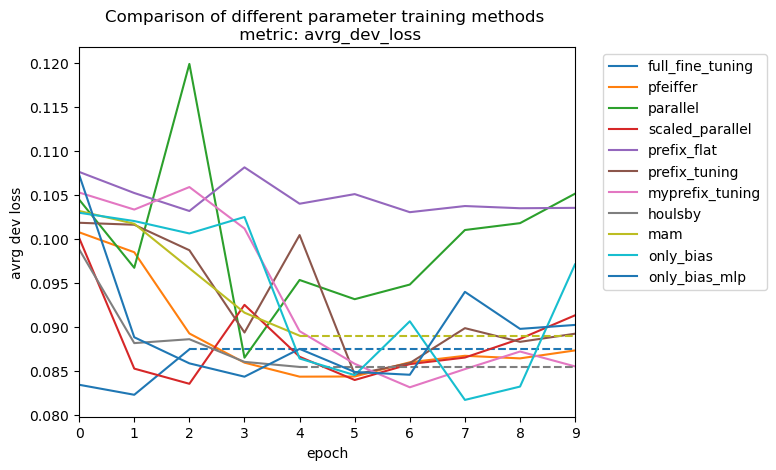

In [77]:
compare_models(histories=histories, metric='avrg_dev_loss', max_epochs=9)

# Compare PELT Methods - Same setting
##### Parameters
Learning rate 5e-05, Dropout 0.1, weight_decay 0.1, epochs between 4 and 30, AdamW, Linear Scheduler, batch_size 16
##### Layers:
```
self.bert = BertModel.from_pretrained(‘roberta-base’’)
self.after_bert = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(768, 100))

        self.regressor = nn.Sequential(
            nn.Linear(100, 10),
            nn.ReLU(),
            nn.Linear(10, 1))
```

##### Methods and model names:
* Full fine-tuning: 22-04-25_0835
* BitFit: 22-04-25_1350
* MAM: 22-04-26_0656
* Houlsby Bottleneck: 22-04-26_0758
* Parallel: 22-04-26_0848
* Prefix Tuning (with Bottleneck): 22-04-26_0935
* BitFit MLP: 22-04-26_1058

In [90]:
full_fine_tuning = pd.read_csv('../output/history_baseline_distress_22-04-25_0835.csv')

full_fine_tuning = full_fine_tuning.fillna(0)
bitfit = pd.read_csv('../output/history_baseline_distress_22-04-25_1350.csv')
mam = pd.read_csv('../output/history_baseline_distress_22-04-26_0656.csv')
houlsby = pd.read_csv('../output/history_baseline_distress_22-04-26_0758.csv')
parallel = pd.read_csv('../output/history_baseline_distress_22-04-26_0848.csv')
#scaled_parallel = pd.read_csv('../output/history_adapters_distress_22-04-18_1155.csv')
#mam = pd.read_csv('../output/history_adapters_distress_22-04-15_0722.csv')
prefix_tuning = pd.read_csv('../output/history_baseline_distress_22-04-26_0935.csv')
#myprefix_tuning = pd.read_csv('../output/history_adapters_distress_22-04-18_1217.csv')
#prefix_flat = pd.read_csv('../output/history_adapters_distress_22-04-18_1119.csv')
#bitfit_mlp = pd.read_csv('../output/history_baseline_distress_22-04-26_1058.csv')


histories = [('full_fine_tuning', full_fine_tuning), ('houlsby', houlsby), ('parallel', parallel), ('prefix_tuning', prefix_tuning), ('bitfit', bitfit)]#, ('bitfit_mlp', bitfit_mlp)]

histories = [(n, hist.loc[hist.fold == -1]) for n, hist in histories]

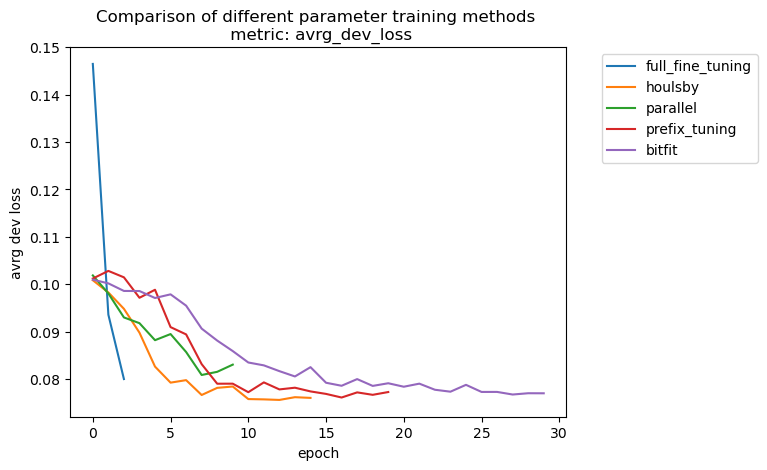

In [100]:
metric = 'avrg_dev_loss'
def compare_pelts(metric, history):
    for n, h in histories:
        corr = h[metric]
        p = plt.plot(h['epoch'], corr, label=n)
        # if model is not trained for 10 epochs, extend it with a dotted line
        missing_diff = max_epochs + 1 - len(corr)
        #if missing_diff > 0:
        #    corr_ext = [corr[-1:].item() for e in range(missing_diff + 1)]  # extension
        #    corr_ext_y = [len(corr) - 1 + e for e in range(missing_diff + 1)] 
        #    plt.plot(corr_ext_y, corr_ext, linestyle='--', c=p[0].get_color())
            
    #plt.xlim(0, max_epochs)
    plt.legend(loc="upper right",bbox_to_anchor=(1.4,1))
    plt.title(f'Comparison of different parameter training methods \n metric: {metric}')
    plt.ylabel(metric.replace('_', ' '))
    plt.xlabel('epoch')
    plt.show()

compare_pelts(metric, histories)

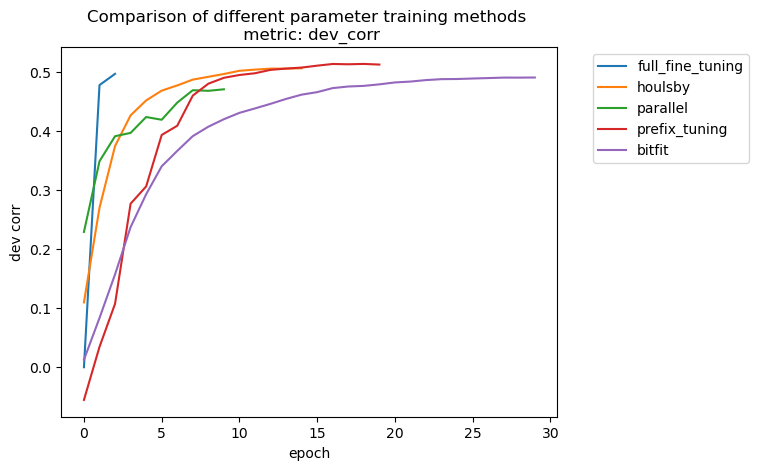

In [103]:

compare_pelts('dev_corr', histories)